<a href="https://colab.research.google.com/github/kevinash/awesome-ai/blob/main/notebooks/5_FacesAndExpressions/Mediapipe_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Face Detection Solution API in Python (see also http://solutions.mediapipe.dev/face_detection).

In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe

Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving garrett-jackson-auTAb39ImXg-unsplash .jpg to garrett-jackson-auTAb39ImXg-unsplash .jpg
Saving radu-florin-JyVcAIUAcPM-unsplash .jpg to radu-florin-JyVcAIUAcPM-unsplash .jpg


garrett-jackson-auTAb39ImXg-unsplash .jpg


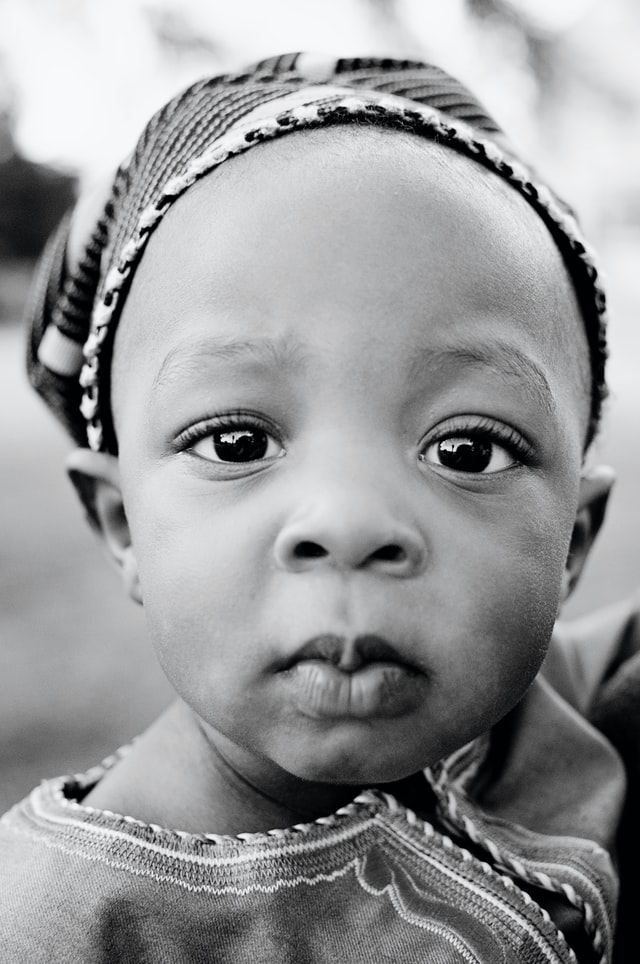

radu-florin-JyVcAIUAcPM-unsplash .jpg


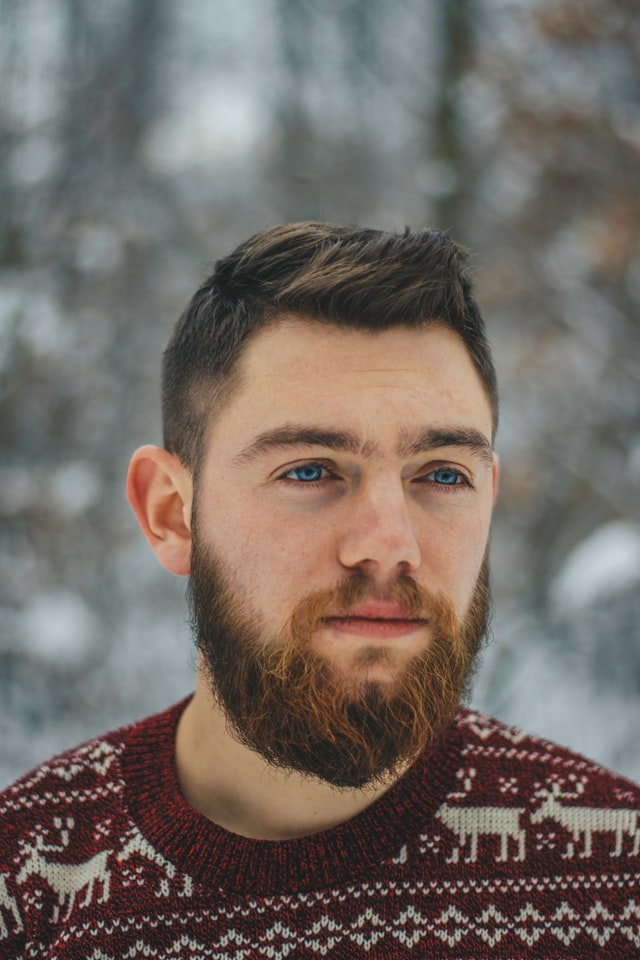

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as mp_face_detection = mp.solutions.face_detection.

You may change the parameter min_detection_confidence during the initialization. Run help(mp_face_detection.FaceDetection) to get more informations about the parameter.

In [ ]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

help(mp_face_detection.FaceDetection)

Help on class FaceDetection in module mediapipe.python.solutions.face_detection:

class FaceDetection(mediapipe.python.solution_base.SolutionBase)
 |  FaceDetection(min_detection_confidence=0.5)
 |  
 |  MediaPipe Face Detection.
 |  
 |  MediaPipe Face Detection processes an RGB image and returns a list of the
 |  detected face location data.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/face_detection#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceDetection
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, min_detection_confidence=0.5)
 |      Initializes a MediaPipe Face Detection object.
 |      
 |      Args:
 |        min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for face
 |          detection to be considered successful. See details in
 |          https://solutions.mediapipe.dev/face_detection#min_detection_confidence.
 |  


In [ ]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of garrett-jackson-auTAb39ImXg-unsplash .jpg:


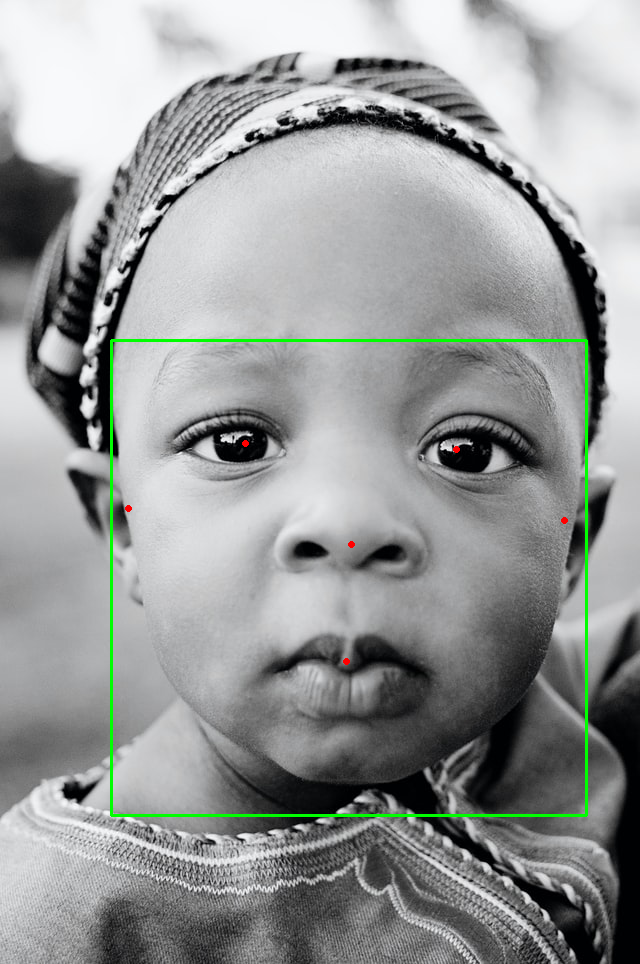

Face detections of radu-florin-JyVcAIUAcPM-unsplash .jpg:


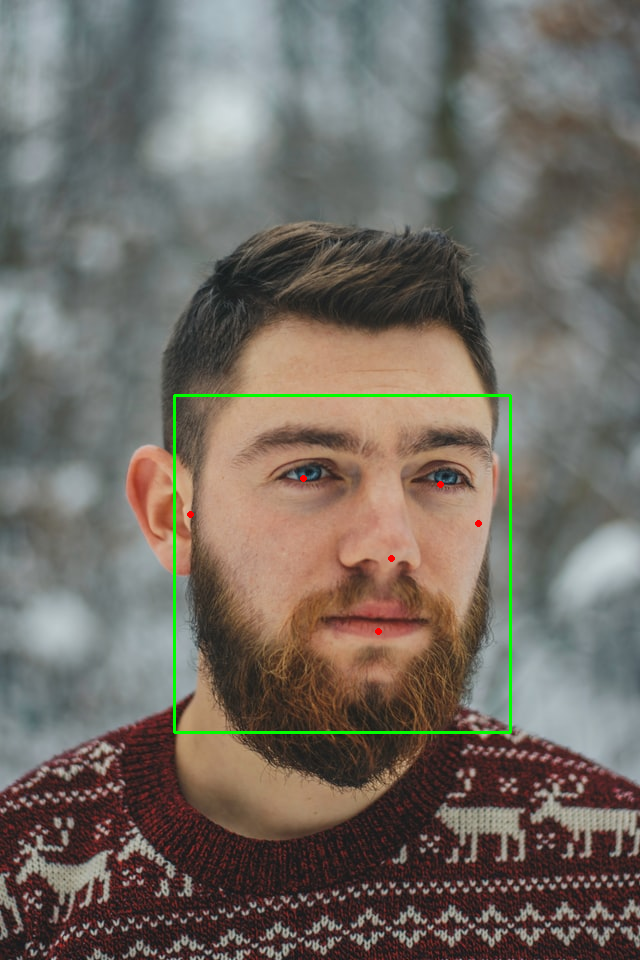

In [ ]:
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5) as face_detection:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      # print('Nose tip:')
      # print(mp.python.solutions.face_detection.get_key_point(
      #     detection, mp_face_detection.FaceKeyPoints.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
      cv2_imshow(annotated_image)